In [63]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
import time

In [4]:
DataFrame = pd.read_csv(r"C:\Users\Teja Nikhil\DL-SIP\Pre-processed_Collected_CSV.csv")

In [5]:
mapping = {float(0.0):'A', float(2.5): 'B', float(5.0): 'C', float(7.5): 'D', float(10.0): 'F'}
DataFrame['Grades'] = DataFrame['Grades'].map(mapping)

In [6]:
mapping = {"A":0, "B": 1, "C": 2, "D": 3, "F": 4}
DataFrame['Grades'] = DataFrame['Grades'].map(mapping)

In [8]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(DataFrame["Padded_Sentence"], DataFrame["Grades"], test_size=0.2, random_state=42)

In [9]:
train_text_data = train_X
test_text_data = test_X

In [34]:
vectorizer = TfidfVectorizer()
answer_vectors = vectorizer.fit_transform(train_X)

In [64]:
train1_start = time.time()
model1 = MLPClassifier(hidden_layer_sizes = (64,32))
model1.fit(answer_vectors, train_y)
train1_stop = time.time()

train2_start = time.time()
model2 = MLPClassifier(hidden_layer_sizes = (128,64,32))
model2.fit(answer_vectors, train_y)
train2_stop = time.time()

train3_start = time.time()
model3 = MLPClassifier(hidden_layer_sizes = (64,32), early_stopping=True,learning_rate_init=0.01)
model3.fit(answer_vectors, train_y)
train3_stop = time.time()

C:\Users\Teja Nikhil\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [65]:
print(train1_stop - train1_start)
print(train2_stop - train2_start)
print(train2_stop - train2_start)

2.46759033203125
7.361127853393555
7.361127853393555


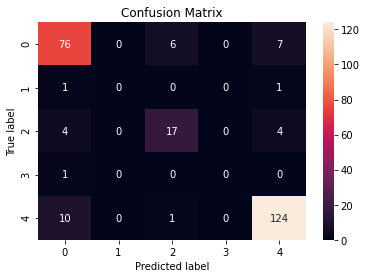

Training Accuracy : 99.40%
Testing Accuracy : 86.11%
Precision : 0.85%
Recall : 0.86%
f1score : 0.86%


C:\Users\Teja Nikhil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


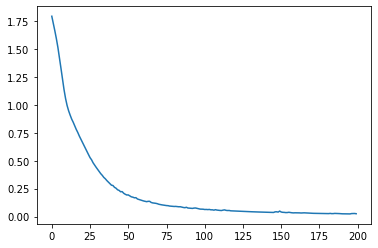

In [62]:
true_labels = test_y
test_pred_labels = model1.predict(vectorizer.transform(test_X))
train_pred_labels = model1.predict(vectorizer.transform(train_X))

cm = confusion_matrix(true_labels, test_pred_labels)

import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import accuracy_score, plot_confusion_matrix, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score
train_accuracy = accuracy_score(train_y, train_pred_labels)*100
test_accuracy = accuracy_score(test_y, test_pred_labels)*100
precision = precision_score(test_y, test_pred_labels, average='weighted')
recall = recall_score(test_y, test_pred_labels, average='weighted')
f1score = f1_score(test_y, test_pred_labels,average='weighted')

print("Training Accuracy : {:.2f}%".format(train_accuracy))
print("Testing Accuracy : {:.2f}%".format(test_accuracy))
print("Precision : {:.2f}%".format(precision))
print("Recall : {:.2f}%".format(recall))
print("f1score : {:.2f}%".format(f1score))

plt.plot(model.loss_curve_)

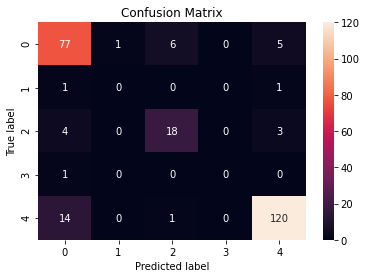

Training Accuracy : 99.70%
Testing Accuracy : 85.32%
Precision : 0.85%
Recall : 0.85%
f1score : 0.85%


C:\Users\Teja Nikhil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


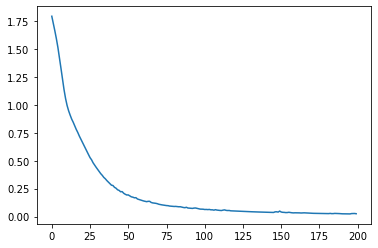

In [60]:
true_labels = test_y
test_pred_labels = model2.predict(vectorizer.transform(test_X))
train_pred_labels = model2.predict(vectorizer.transform(train_X))

cm = confusion_matrix(true_labels, test_pred_labels)

import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import accuracy_score, plot_confusion_matrix, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score
train_accuracy = accuracy_score(train_y, train_pred_labels)*100
test_accuracy = accuracy_score(test_y, test_pred_labels)*100
precision = precision_score(test_y, test_pred_labels, average='weighted')
recall = recall_score(test_y, test_pred_labels, average='weighted')
f1score = f1_score(test_y, test_pred_labels,average='weighted')

print("Training Accuracy : {:.2f}%".format(train_accuracy))
print("Testing Accuracy : {:.2f}%".format(test_accuracy))
print("Precision : {:.2f}%".format(precision))
print("Recall : {:.2f}%".format(recall))
print("f1score : {:.2f}%".format(f1score))

plt.plot(model.loss_curve_)

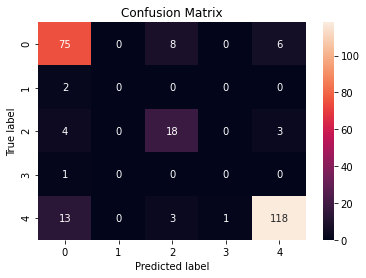

Training Accuracy : 95.53%
Testing Accuracy : 83.73%
Precision : 0.84%
Recall : 0.84%
f1score : 0.84%


C:\Users\Teja Nikhil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


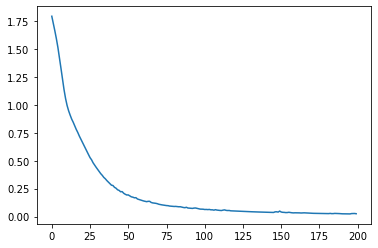

In [61]:
true_labels = test_y
test_pred_labels = model3.predict(vectorizer.transform(test_X))
train_pred_labels = model3.predict(vectorizer.transform(train_X))

cm = confusion_matrix(true_labels, test_pred_labels)

import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import accuracy_score, plot_confusion_matrix, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score
train_accuracy = accuracy_score(train_y, train_pred_labels)*100
test_accuracy = accuracy_score(test_y, test_pred_labels)*100
precision = precision_score(test_y, test_pred_labels, average='weighted')
recall = recall_score(test_y, test_pred_labels, average='weighted')
f1score = f1_score(test_y, test_pred_labels,average='weighted')

print("Training Accuracy : {:.2f}%".format(train_accuracy))
print("Testing Accuracy : {:.2f}%".format(test_accuracy))
print("Precision : {:.2f}%".format(precision))
print("Recall : {:.2f}%".format(recall))
print("f1score : {:.2f}%".format(f1score))

plt.plot(model.loss_curve_)